# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

**Business Context**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.


**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [ ]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline
import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

In [ ]:
# import the scipy and check the version to be sure that the version is above 1.6.1.
import scipy
scipy.__version__

'1.11.4'

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Data Science and Business Analytics/Business Statistics/Project/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
#First 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#Last few rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#Shape of the dataset
df.shape

(100, 6)

The dataset has 100 rows and 6 columns

In [ ]:
#Statistical summary of the dataset
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In summary, the average time spent on the website is 5.38 minutes with a median of 5.42. The time spent ranges from a minimum of 0.19 to 10.71 with a standard deviation of 2.38

In [ ]:
#Check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values on the dataset

In [ ]:
#Check for any duplicates
df.duplicated().sum()

0

There are no duplicates on the dataset

### Univariate Analysis

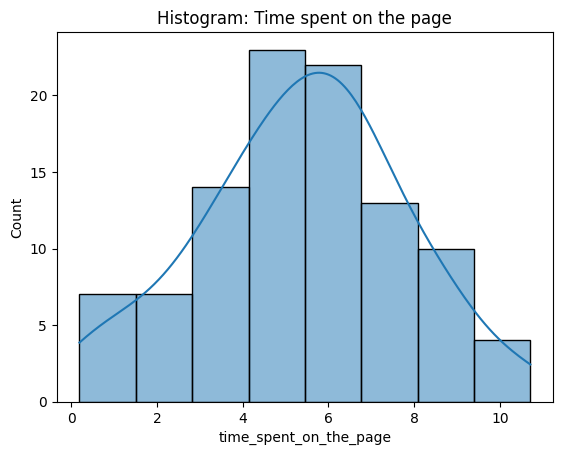

In [ ]:
sns.histplot(data=df, x='time_spent_on_the_page', kde=True);
plt.title('Histogram: Time spent on the page');

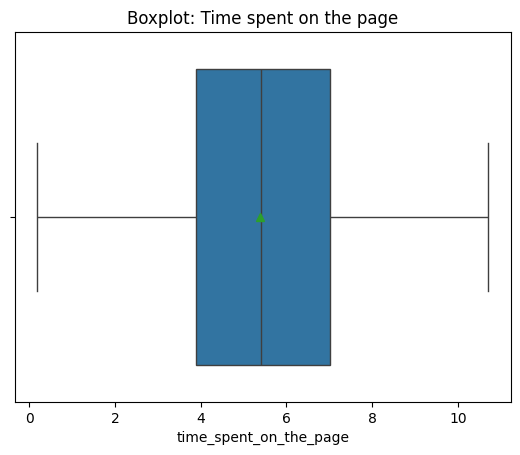

In [ ]:
sns.boxplot(data=df, x='time_spent_on_the_page', showmeans=True);
plt.title('Boxplot: Time spent on the page');

Observations:

The time spent on the page appears to have a normal distribution with no outliers

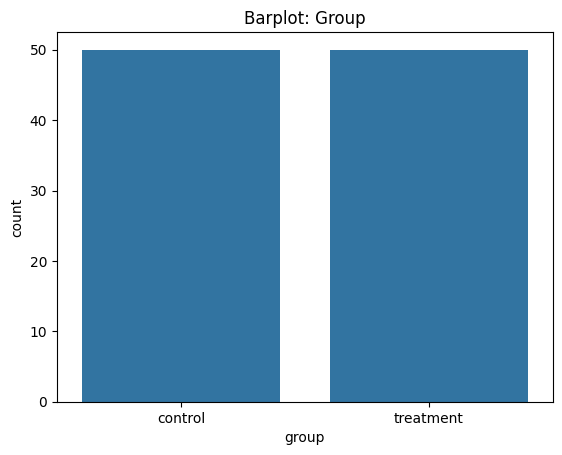

In [ ]:
sns.countplot(data=df, x='group');
plt.title("Barplot: Group");

Observations:

The control and treatment groups have equal number of viewers.

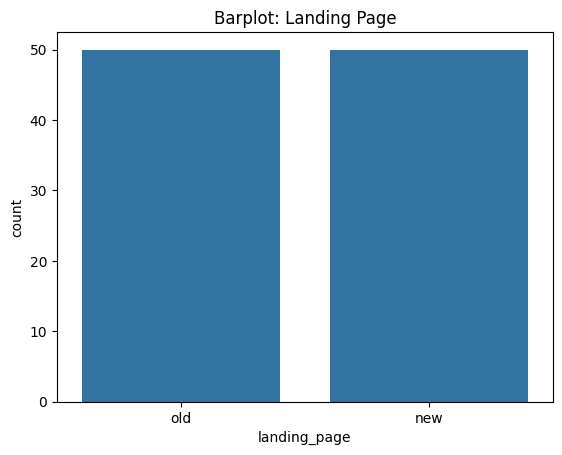

In [ ]:
sns.countplot(data=df, x='landing_page');
plt.title("Barplot: Landing Page");

Observations:

The old and new landing pages have equal number of viewers.

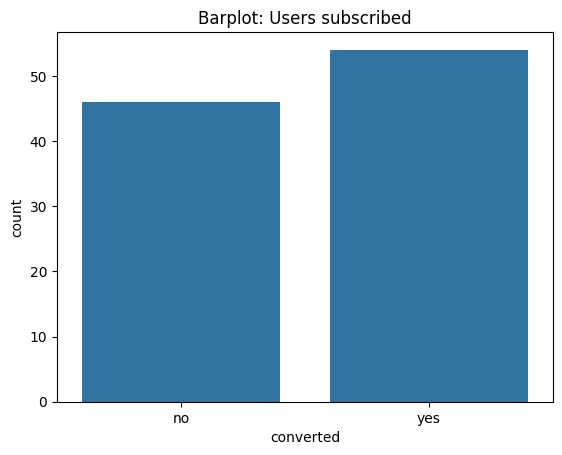

In [ ]:
sns.countplot(data=df, x='converted');
plt.title("Barplot: Users subscribed");

Observations:

More than 50% of users in this study ended up subscribing.

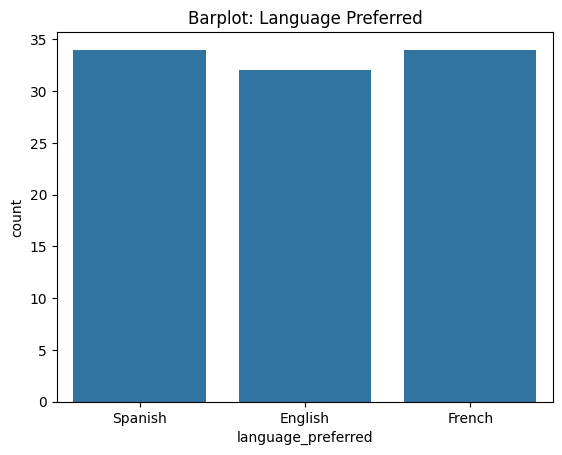

In [ ]:
sns.countplot(data=df, x='language_preferred');
plt.title("Barplot: Language Preferred");

Observations:

Spanish and French are the preferred languages followed by English by a small difference.

### Bivariate Analysis

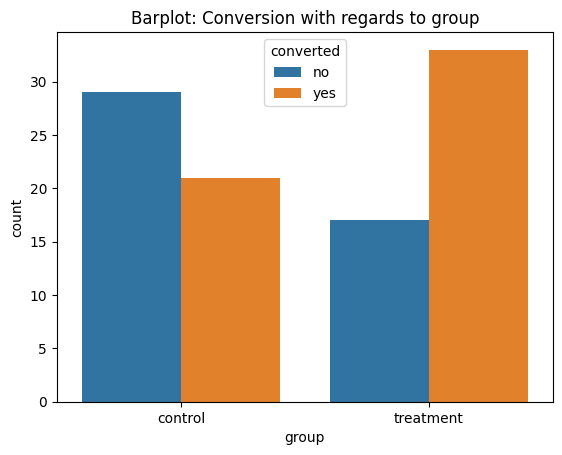

In [ ]:
sns.countplot(data=df, x='group', hue='converted');
plt.title("Barplot: Conversion with regards to group");

Observations:

More vieweres subscribed from the treatment group compared to the control group.
The new landing page shows more success in acquiring more subscribers than the old landing page.

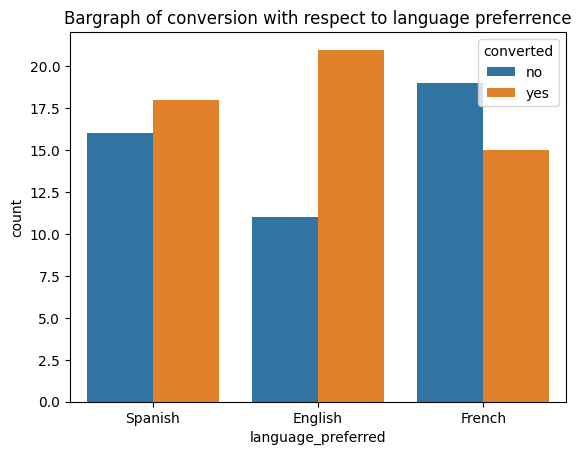

In [ ]:
sns.countplot(data=df, x='language_preferred', hue='converted');
plt.title('Bargraph of conversion with respect to language preferrence');

Observations:

- Viewers with English as their preferred language subscribed more than Spanish and French.
- More than 50% of viewers with English and Spanish as their preferred language subscribed.
- Less than 50% of viewers with French as their preferred language subscribed.


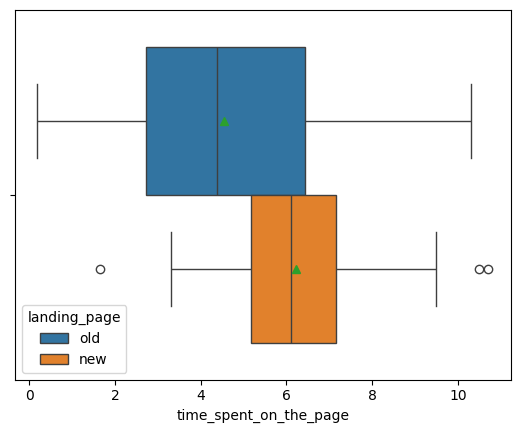

In [ ]:
sns.boxplot(data=df,x='time_spent_on_the_page', hue='landing_page', showmeans=True);

Observations:

On average, viewers with the new landing page spend more time on the website than the old landing page.

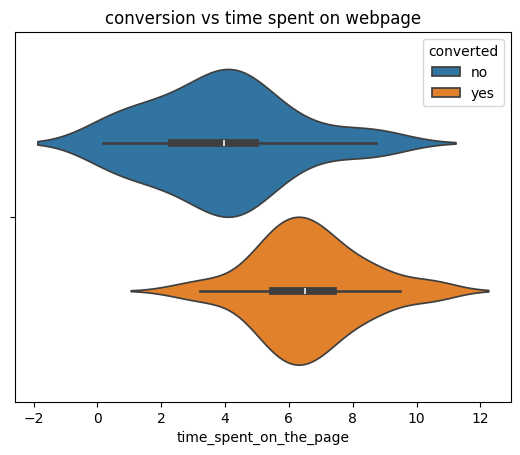

In [ ]:
sns.violinplot(data=df,x='time_spent_on_the_page', hue='converted');
plt.title('conversion vs time spent on webpage');

Observations:

The IQR for viewers who subscribed spend more time on the webpage than viewers who does not subscribe.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

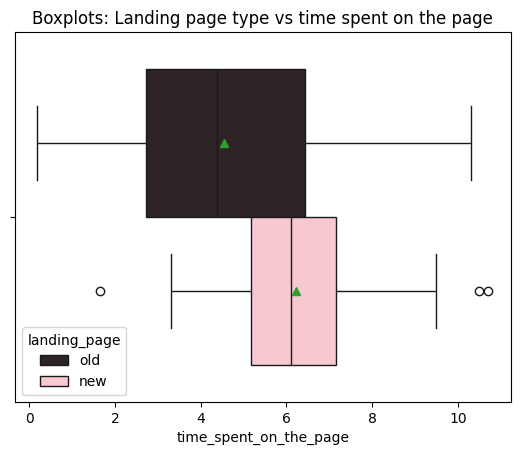

In [ ]:
#Comparing the boxplots for the new and old landing page with respect to time spent on website helps us visualize their differences.
sns.boxplot(data=df, x='time_spent_on_the_page', hue='landing_page', showmeans=True, palette='dark:pink');
plt.title('Boxplots: Landing page type vs time spent on the page');

### Step 1: Define the null and alternate hypotheses



Let $\mu_1, \mu_2$ be the mean time spent on the new and old landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

In [ ]:
# find the sample means and sample standard deviations for the two samples in order to gather more information to determine adecuate test to use.
print('The sample mean for the landing pages are: ', round(df.groupby('landing_page')['time_spent_on_the_page'].mean(),2))
print('The sample standard deviation for the landing pages are: ', round(df.groupby('landing_page')['time_spent_on_the_page'].std(),2))

The sample mean for the landing pages are:  landing_page
new    6.22
old    4.53
Name: time_spent_on_the_page, dtype: float64
The sample standard deviation for the landing pages are:  landing_page
new    1.82
old    2.58
Name: time_spent_on_the_page, dtype: float64


### Step 2: Select Appropriate test

### Two sample independent T-test
### Assumptions are satisfied

* Continuous data - Yes
* Normally distributed populations - Yes, the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

### Step 3: Decide the significance level

Significance level: 5%


𝛂 = 0.05

### Step 4: Collect and prepare data

In [ ]:
time_spent_on_new_page=df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_on_old_page=df[df['landing_page'] == 'old']['time_spent_on_the_page']
print('The sample standard deviation for the new landing page is:',round(time_spent_on_new_page.std(),2))
print('The sample standard deviation for the old landing page is:',round(time_spent_on_old_page.std(),2))

The sample standard deviation for the new landing page is: 1.82
The sample standard deviation for the old landing page is: 2.58


The sample standard deviation for the two groups is different therefore, we assume that the population standard deviation is unequal.

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind
test_stat, p_value=ttest_ind(time_spent_on_new_page, time_spent_on_old_page, equal_var=False, alternative='greater')
print('The p_value is:', p_value)

The p_value is: 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print('Since the p-value is less than the level of significance, we reject the null hypothesis.')
else:
    print('Since the p-value is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.00014) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to infer that users spend more time in the new landing page than the existing landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

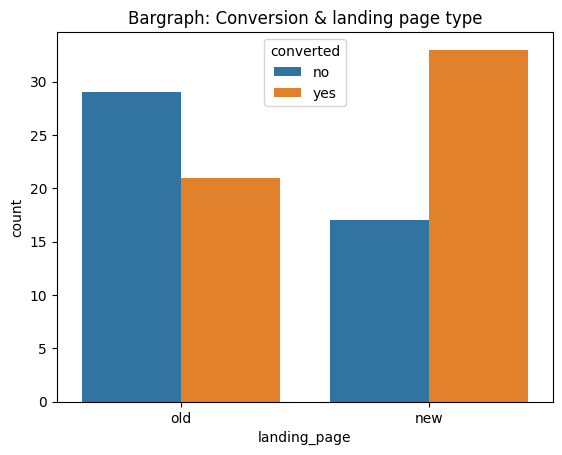

In [ ]:
#Lets first visualize the conversion rates for the two groups (control-existing page, treatment-new page)
sns.countplot(data=df, x='landing_page', hue='converted',);
plt.title('Bargraph: Conversion & landing page type');

###Hypothesis

Let P1, P2 be the conversion rate on the new and old landing page respectively.

We will test the null hypothesis

>$H_0:P1=P2$

against the alternate hypothesis

>$H_a:P1>P2$

###Test Statistic

We want to compare two proportions from two populations, therefore we will perform a one-tail **two sample Z test**

###Significance Level


Significance level: 5%


𝛂 = 0.05

###Understanding and preparing the data

In [ ]:
#Lets determine the viewers who subscribed from each group
conversion_current_page = df[df['landing_page']=='old'][['converted']].value_counts()['yes']
conversion_new_page = df[df['landing_page']=='new'][['converted']].value_counts()['yes']
#Lets determine the total observations from each group
viewers_current_page = df['group'].value_counts()['control']
viewers_new_page = df['group'].value_counts()['treatment']
#Lets set our proportions and our end obsercations
conversions = np.array(conversion_current_page,conversion_new_page)
viewers_count = np.array(viewers_current_page,viewers_new_page)

###P_value

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
test_stat, p_value = proportions_ztest([conversion_new_page,conversion_current_page], [viewers_new_page,viewers_current_page], alternative='larger')
print('The p_value is:', p_value)

The p_value is: 0.008026308204056278


###Comparing p_value with $\alpha$

In [ ]:
if p_value < 0.05:
    print('Since the p-value is less than the level of significance, we reject the null hypothesis.')
else:
    print('Since the p-value is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value is less than the level of significance, we reject the null hypothesis.


###Inference

Since the p-value (~0.008) is less than the level of significance, we can reject the null hypothesis.

**We have enough evidence to infer that the new landing page will have more conversion rates than the current landing page.**

## 3. Is the conversion and preferred language are independent or related?

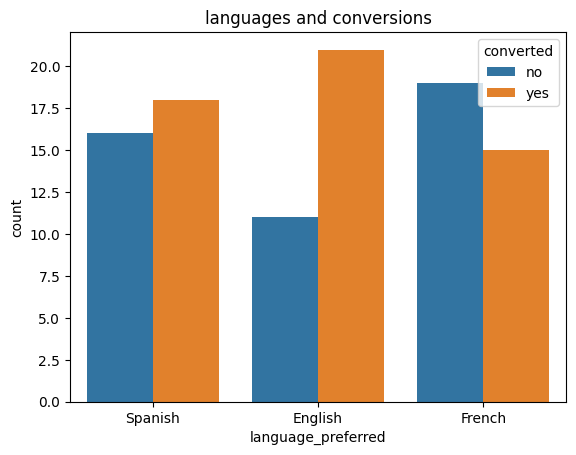

In [ ]:
#Lets first visualize the two categorical variables 'conversion' and 'prefered language'
sns.countplot(data=df, x='language_preferred', hue='converted');
plt.title('languages and conversions');

###Hypothesis

We will test the null hypothesis

>$H_0:$ Conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Conversion depends on preferred language.

###Test Statistic

This hypothesis requires a **Chi-square Test (Test of Independence)**
#### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

###Significance Level

Significance level: 5%


𝛂 = 0.05

###Understand and prepare data

In [ ]:
table=pd.crosstab(df['converted'],df['language_preferred'])
table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


###P_Value

In [ ]:
from scipy.stats import chi2_contingency
chi, p_value, dof, expected_freq = chi2_contingency(table)
print('The p_value is:', p_value)

The p_value is: 0.21298887487543447


###Compare p_value with significance level

In [ ]:
if p_value < 0.05:
    print('Since the p-value is less than the level of significance, we reject the null hypothesis.')
else:
    print('Since the p-value is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value is greater than the level of significance, we fail to reject the null hypothesis.


###Inference

Since the p-value (~0.21) is more than the level of significance, we fail to reject the null hypothesis.

**We don't have enough statistical evidence to infer that the conversion status is dependent on language preferrence.**

## 4. Is the time spent on the new page same for the different language users?

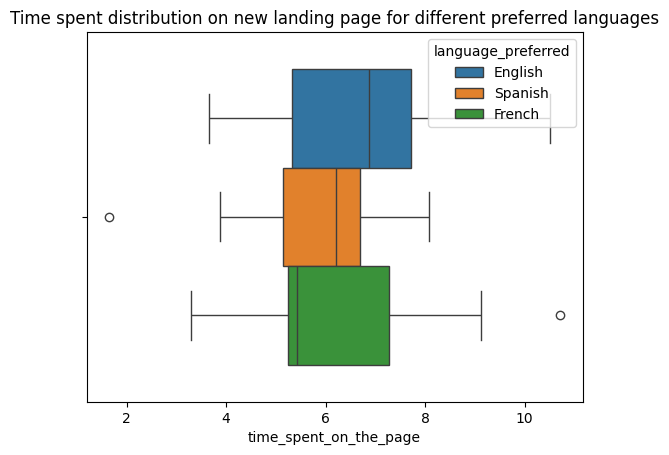

In [ ]:
#Lets visualize the distribution for the time spent on the new landing page according to different preferred langugaes
alldata_new_page = df[df['landing_page']=='new']
sns.boxplot(data=alldata_new_page, x='time_spent_on_the_page', hue='language_preferred');
plt.title('Time spent distribution on new landing page for different preferred languages');

###Hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the mean of time spent on the new landing page for English, Spanish and French languages respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one language mean is different from the others.

###Test Statistic

###Significance Level

Significance level: 5%

𝛂 = 0.05

###Understand and prepare data

In [ ]:
time_english = alldata_new_page[alldata_new_page['language_preferred']=='English']['time_spent_on_the_page']
time_spanish = alldata_new_page[alldata_new_page['language_preferred']=='Spanish']['time_spent_on_the_page']
time_french = alldata_new_page[alldata_new_page['language_preferred']=='French']['time_spent_on_the_page']

###P_value

In [ ]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(time_english, time_spanish, time_french)
print('The p_value is:', p_value)

The p_value is: 0.43204138694325955


###Compare p_value with significance level

In [ ]:
if p_value < 0.05:
    print('Since the p-value is less than the level of significance, we reject the null hypothesis.')
else:
    print('Since the p-value is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value is greater than the level of significance, we fail to reject the null hypothesis.


###Inference

Since the p-value (~0.43) is greater than the level of significance, we fail to reject the null hypothesis.

**We don't have enough statistical evidence to infer that the the time spent on the new landing page differs between language preferrance.**

## Conclusion and Business Recommendations

We have enough statistical evidence to infer the following:
- Users spend more time on the new landing page than the existing landing page. The company should change to the new landing page if they want users to spend more time on the website.
- The new landing page has more conversion rates than the current landing page.

Therefore, I recommend the business to change the existing landing page to the new landing page to gain more conversion rates and screen time from viewers.



We don't have enough statistical evidence to infer that the conversion status is dependent on language preferrence.

We don't have enough statistical evidence to infer that the the time spent on the new landing page differs between language preferrance.

___